In [19]:
import pandas as pd

In [20]:
covid19_file = r"C:\Users\Bhavin\Desktop\Covid-19\Covid-19 kaggle\covid_19_data.csv"
covid19 = pd.read_csv(covid19_file, parse_dates=['ObservationDate'])
print(covid19.tail())

         SNo ObservationDate Province/State  Country/Region  \
10041  10042      2020-03-29        Wyoming              US   
10042  10043      2020-03-29       Xinjiang  Mainland China   
10043  10044      2020-03-29          Yukon          Canada   
10044  10045      2020-03-29         Yunnan  Mainland China   
10045  10046      2020-03-29       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
10041  2020-03-29 23:14:06       86.0     0.0        0.0  
10042  2020-03-29 23:14:06       76.0     3.0       73.0  
10043  2020-03-29 23:14:06        4.0     0.0        0.0  
10044  2020-03-29 23:14:06      180.0     2.0      172.0  
10045  2020-03-29 23:14:06     1254.0     1.0     1225.0  


In [23]:
covid19_date_country = covid19.groupby(['ObservationDate','Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum()
print(covid19_date_country.tail())

                                    Confirmed  Deaths  Recovered
ObservationDate Country/Region                                  
2020-03-29      Venezuela               119.0     2.0       39.0
                Vietnam                 188.0     0.0       25.0
                West Bank and Gaza      109.0     1.0       18.0
                Zambia                   29.0     0.0        0.0
                Zimbabwe                  7.0     1.0        0.0


In [24]:
covid19_date_country['Mortality'] = covid19_date_country['Deaths']*100/covid19_date_country['Confirmed']
covid19_date_country['Recovery'] = covid19_date_country['Recovered']*100/covid19_date_country['Confirmed']
print(covid19_date_country.tail())

                                    Confirmed  Deaths  Recovered  Mortality  \
ObservationDate Country/Region                                                
2020-03-29      Venezuela               119.0     2.0       39.0   1.680672   
                Vietnam                 188.0     0.0       25.0   0.000000   
                West Bank and Gaza      109.0     1.0       18.0   0.917431   
                Zambia                   29.0     0.0        0.0   0.000000   
                Zimbabwe                  7.0     1.0        0.0  14.285714   

                                     Recovery  
ObservationDate Country/Region                 
2020-03-29      Venezuela           32.773109  
                Vietnam             13.297872  
                West Bank and Gaza  16.513761  
                Zambia               0.000000  
                Zimbabwe             0.000000  


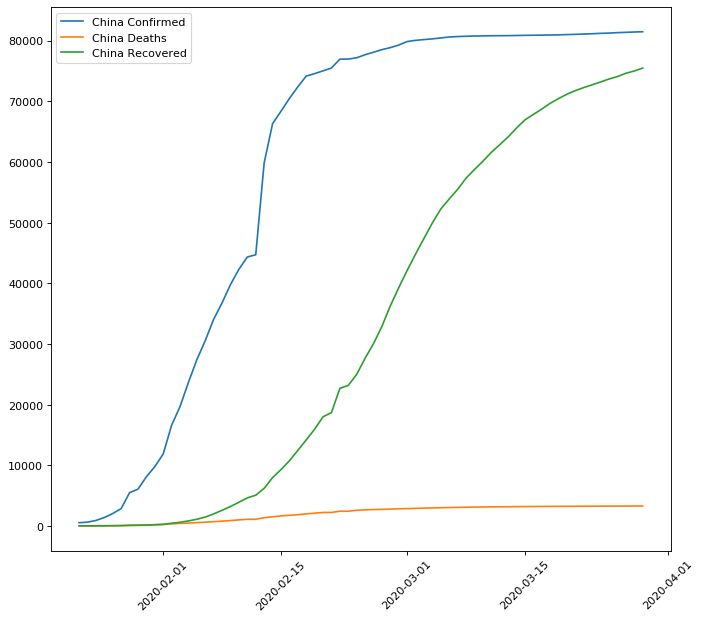

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

#Extracting only china data
china = covid19_date_country.loc[(slice(None),'Mainland China'),:].reset_index()

plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Confirmed'], label='China Confirmed')
plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Deaths'], label='China Deaths')
plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Recovered'], label='China Recovered')
plt.xticks(rotation=45)
plt.legend()
plt.show()

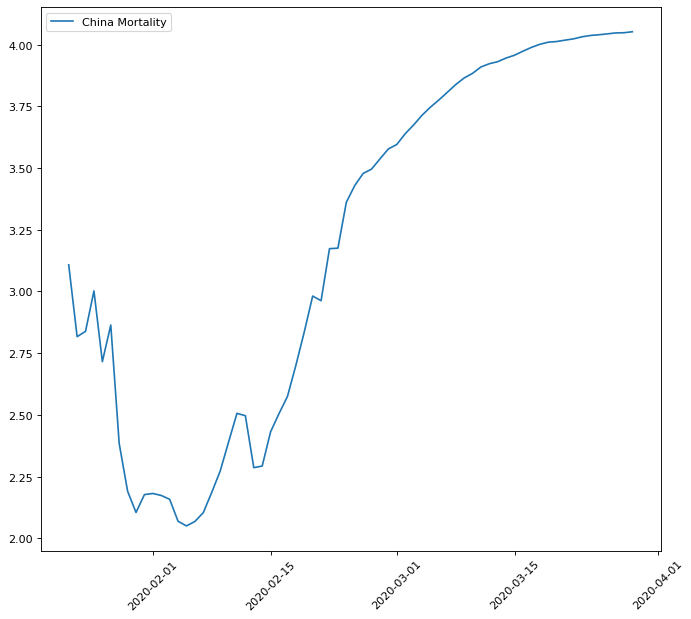

In [26]:
plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Mortality'], label='China Mortality')
plt.xticks(rotation=45)
plt.legend(loc=2)
plt.show()

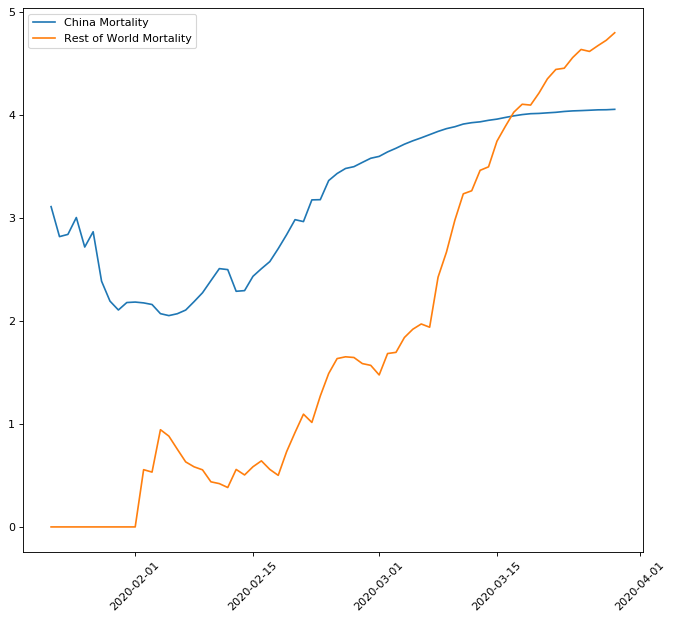

In [27]:
covid19_world = covid19_date_country.reset_index()
covid19_world_wo_china = covid19_world[covid19_world['Country/Region']!='Mainland China']
world_wo_china = covid19_world_wo_china.groupby('ObservationDate').sum().reset_index()

world_wo_china['Mortality'] = world_wo_china['Deaths']*100/world_wo_china['Confirmed']
world_wo_china['Recovery'] = world_wo_china['Recovered']*100/world_wo_china['Confirmed']

#Comparison of mortality

plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Mortality'], label='China Mortality')
plt.plot(world_wo_china.loc[:,'ObservationDate'], world_wo_china.loc[:,'Mortality'], label='Rest of World Mortality')

plt.xticks(rotation=45)
plt.legend(loc=2)
plt.show()

In [29]:
all_countries = covid19_date_country.reset_index()
top_countries = all_countries.sort_values(by = ['ObservationDate','Confirmed'], ascending=False)
print(top_countries.head(6))

     ObservationDate  Country/Region  Confirmed   Deaths  Recovered  \
5141      2020-03-29              US   140886.0   2467.0     2665.0   
5054      2020-03-29           Italy    97689.0  10779.0    13030.0   
5075      2020-03-29  Mainland China    81444.0   3300.0    75460.0   
5125      2020-03-29           Spain    80110.0   6803.0    14709.0   
5034      2020-03-29         Germany    62095.0    533.0     9211.0   
5030      2020-03-29          France    40708.0   2611.0     7226.0   

      Mortality   Recovery  
5141   1.751061   1.891600  
5054  11.033996  13.338247  
5075   4.051864  92.652620  
5125   8.492073  18.361004  
5034   0.858362  14.833723  
5030   6.413973  17.750811  


In [31]:
italy = covid19_date_country.loc[(slice(None),'Italy'),:].reset_index()
us = covid19_date_country.loc[(slice(None),'US'),:].reset_index()
spain = covid19_date_country.loc[(slice(None),'Spain'),:].reset_index()
germany = covid19_date_country.loc[(slice(None),'Germany'),:].reset_index()
iran = covid19_date_country.loc[(slice(None),'Iran'),:].reset_index()

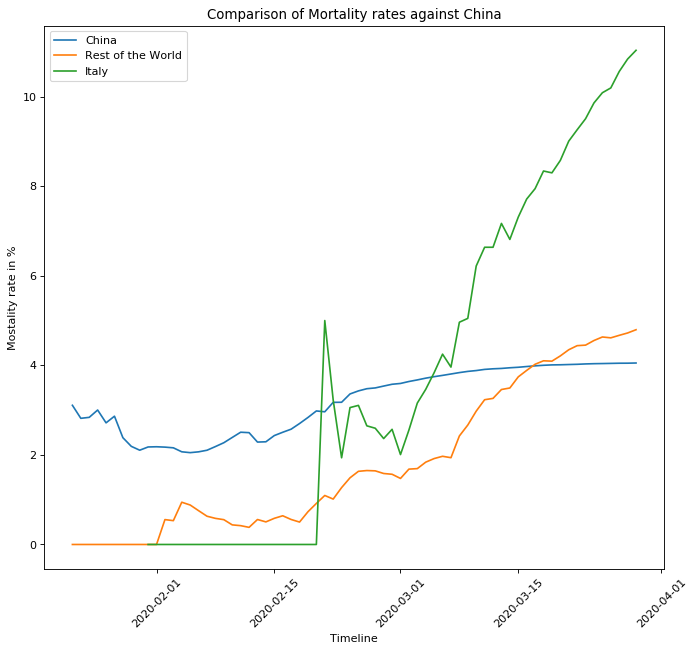

In [39]:
#Comparison of mortality

plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(china.loc[:,'ObservationDate'], china.loc[:,'Mortality'], label='China')
plt.plot(world_wo_china.loc[:,'ObservationDate'], world_wo_china.loc[:,'Mortality'], label='Rest of the World')
plt.plot(italy.loc[:,'ObservationDate'], italy.loc[:,'Mortality'], label='Italy')
#plt.plot(us.loc[:,'ObservationDate'], us.loc[:,'Mortality'], label='US')
#plt.plot(spain.loc[:,'ObservationDate'], spain.loc[:,'Mortality'], label='Spain')
#plt.plot(germany.loc[:,'ObservationDate'], germany.loc[:,'Mortality'], label='Germany')
#plt.plot(iran.loc[:,'ObservationDate'], iran.loc[:,'Mortality'], label='Iran')

plt.title('Comparison of Mortality rates against China')
plt.xlabel('Timeline')
plt.ylabel('Mostality rate in %')
plt.xticks(rotation=45)
plt.legend(loc=2)
plt.show()